In [15]:
import random as rand
import matplotlib.pyplot as plt
import math

In [17]:
def matrix_maker(N):
    ''' Generates a NxN matrix of zeroes '''
    
    matrix = []
    row = []
    for i in range(N):
        row.append(0)
    
    for i in range(N):
        matrix.append(row)
        
    return matrix

In [19]:
def foci_placement(N, F):
    ''' Places P points in the central area, 1/M to 1-1/M, of the NxN matrix '''
    
    # M = 3 places points between 1/3 and 2/3 of the matrix
    M = 3
    lower_bound = round(N/M)
    upper_bound = N - round(N/M)
    
    foci = []
    
    for f in range(F):
        
        # Two random ints in the central area
        focus = (rand.sample(range(lower_bound, upper_bound), 2))
        foci.append(focus)
                  
    return foci

In [21]:
def euclidean_distance(coords, f):
    ''' Calculates the distance between two points '''
    
    dist = math.sqrt((f[0] - coords[0]) ** 2 + (f[1] - coords[1]) ** 2)
        
    return dist

In [23]:
def point_generator(N, foci):
    ''' For every point in the matrix, finds the distance to each focus, adds the distances,
        and if it equals the radius, adds that point to a list to be plotted. 
        if len(foci) = 1, valid_points form a circle
        if len(foci) = 2, valid_points form an ellipse '''
    
    valid_points = []
    
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            # coordinates of each point tested
            coords = i, j
            
            # re-initializing the distance for every point
            dist = 0
            
            # sum of the distances between a point and each focus
            for f in foci:
                # distance between a point and a focus
                dist += euclidean_distance(coords, f)
            
            # testing the distance for equalling the radius
            # F/2 gives a good approximation for a visually pleasing point frequency:
            # 0.5 for 1 focus looks good and 1 for 2 foci looks good.
            if abs(dist - radius) < F/2:
                valid_points.append((i, j))
                    
    return valid_points

In [32]:
def graph(foci, valid_points):
    plt.figure(figsize = (5,5))
    for f in foci:
        plt.plot(N, N)
        plt.xlim(0, N)
        plt.ylim(0, N)
        plt.title(f"Ellipse of size {N}x{N} with {F} foci")
        plt.scatter(f[0], f[1], color = 'black', s = 70)

    for p in valid_points:
        plt.scatter(p[0], p[1], color = 'red', s = 25)

    plt.savefig('N-Ellipse.png', dpi=300, bbox_inches='tight')
    plt.show()

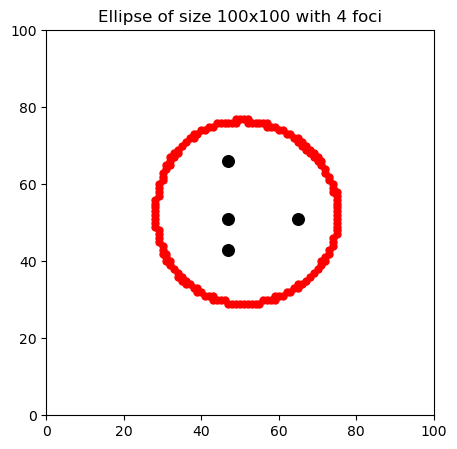

In [115]:
N = 100 # Choose how big of an NxN grid to test points in. Resolution increases with higher N
F = 4   # Choose how many foci:
        # 1: Circle
        # 2: Ellipse
        # 3+: n-ellipse

radius = N / ((8 * 2 ** (-F)) + 0.5) # Radius of points around the foci

matrix = matrix_maker(N) # Initialize matrix
foci = foci_placement(N, F) # Initialize foci
valid_points = point_generator(N, foci) # Find the points that satisfy abs(dist - radius) < F/2
graph(foci, valid_points) # Graphs the points